In [1]:
#importing the headers
import numpy as np
import matplotlib.pyplot as mat
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation#loading the dataset

In [3]:
#featureSelection = [133,132,125,137,123,176,121,1,180,120,168,14,6,181,57]
df = pd.read_csv('Desktop\ExtractedFeature.csv',header=None).values
df

array([[0.52502 , 0.36888 , 0.14873 , ..., 0.15715 , 0.19934 , 1.      ],
       [0.62384 , 0.28767 , 0.11888 , ..., 0.13178 , 0.19217 , 1.      ],
       [0.58845 , 0.38748 , 0.15769 , ..., 0.19137 , 0.20577 , 1.      ],
       ...,
       [0.60758 , 0.2045  , 0.11312 , ..., 0.077386, 0.22369 , 1.      ],
       [0.63377 , 0.37182 , 0.12306 , ..., 0.15133 , 0.2805  , 1.      ],
       [0.62178 , 0.22407 , 0.089093, ..., 0.074719, 0.23841 , 1.      ]])

In [4]:
#splitting the dataset into  X (independant variables) and y (dependant variable)
X = df[:,:-1] #all columns except the last one
y = df[:,len(df[0])-1] #only the last column

In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [7]:
#Predict the response for test dataset
print('Accuracy of Training dataset: {:.3f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Test dataset: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of Training dataset: 1.000
Accuracy of Test dataset: 0.759


In [8]:
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7592592592592593


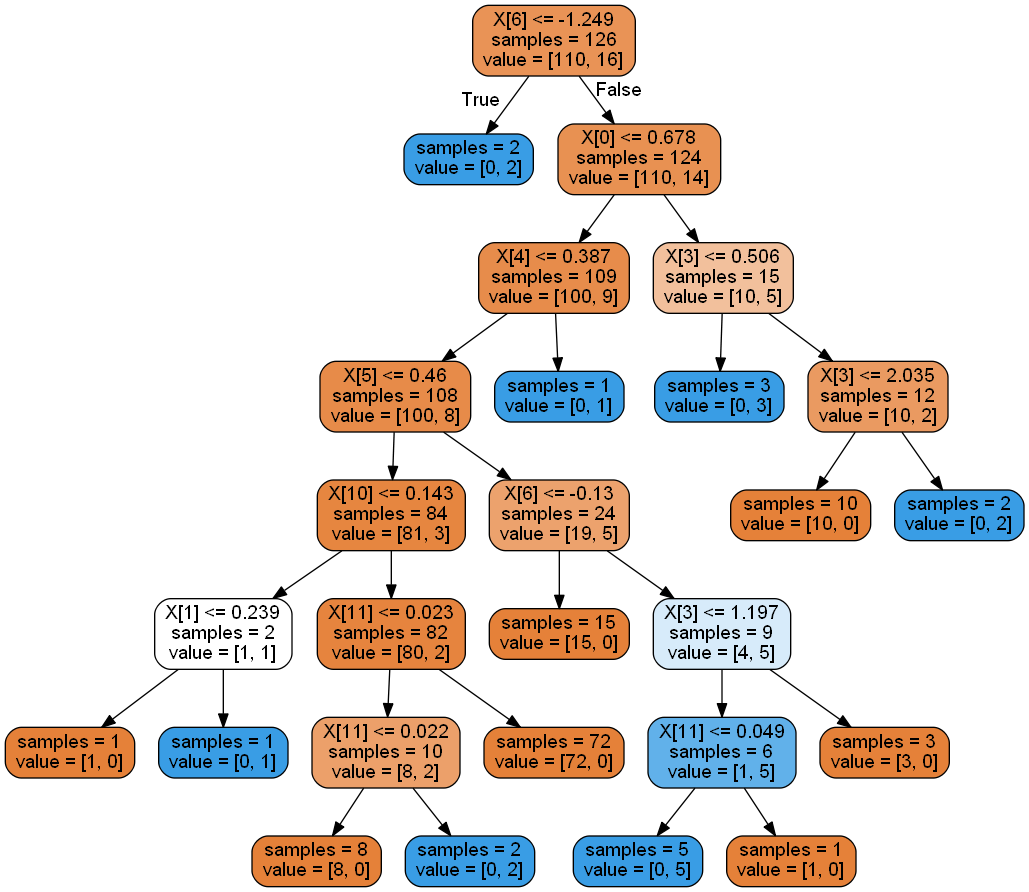

In [10]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                impurity=False,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   
graph.write_png('ExtractedFeatureFromPCAandANOVA.png')
Image(graph.create_png())